# Model Error Analysis
This notebook performs analysis of incorrect predictions created by Extractive Question Answering model `xlm-r-latin`.

Before running, please change file paths in order to correspond to your file structure.

In [12]:
# Import modules
import json
import matplotlib.pyplot as plt

In [13]:
# Load files
with open('../../data/error_analysis/f1_errors-xlm-r-latin.json', 'r') as f:
    f1_errors = json.load(f)
with open('../../data/error_analysis/em_errors-xlm-r-latin.json', 'r') as f:
    em_errors = json.load(f)
with open('../../data/squad-sr/squad-sr-dev-latin.json') as f:
    squad_original = json.load(f)


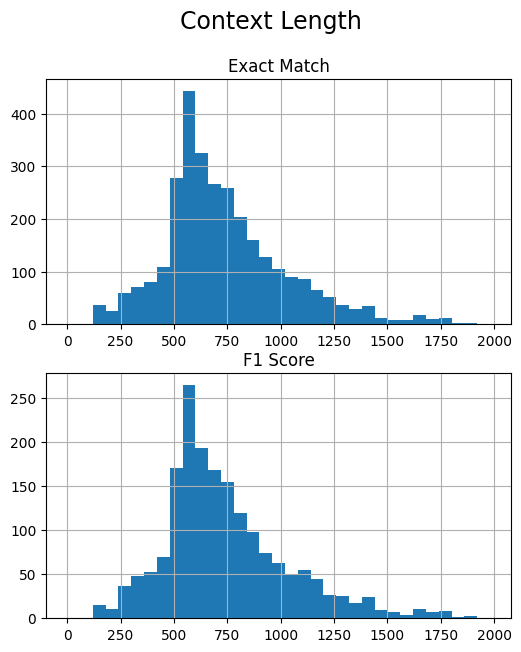

In [14]:
# Plot histograms of context length
f1_context_lens = [len(err['context']) for err in f1_errors]
em_context_lens = [len(err['context']) for err in em_errors]

fig, axs = plt.subplots(2)
fig.suptitle('Context Length', fontsize=17)
fig.set_size_inches(6., 7)
axs[0].hist(em_context_lens, bins=range(0,2000,60));
axs[0].set_title('Exact Match')
axs[0].grid();
axs[1].hist(f1_context_lens, bins=range(0,2000,60));
axs[1].set_title('F1 Score')
axs[1].grid();

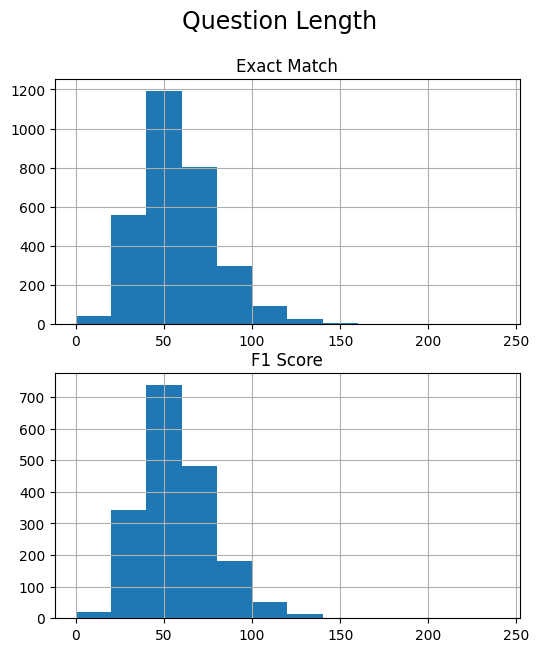

In [15]:
# Plot Histograms of question length
f1_question_lens = [len(err['question']) for err in f1_errors]
em_question_lens = [len(err['question']) for err in em_errors]

fig, axs = plt.subplots(2)
fig.suptitle('Question Length', fontsize=17)
fig.set_size_inches(6., 7)
axs[0].hist(em_question_lens, bins=range(0,250,20));
axs[0].set_title('Exact Match')
axs[0].grid();
axs[1].hist(f1_question_lens, bins=range(0,250,20));
axs[1].set_title('F1 Score')
axs[1].grid();

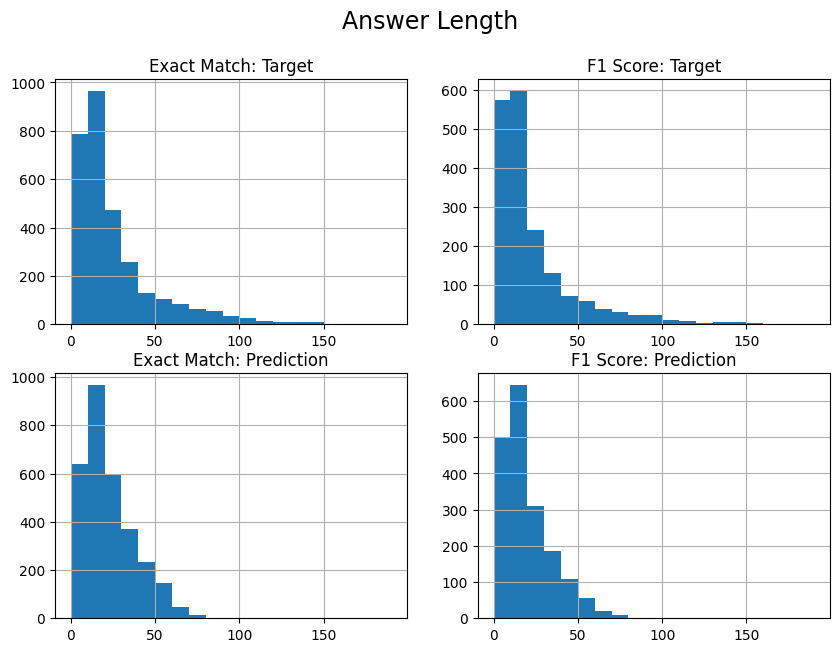

In [16]:
# Histograms of answer length
f1_answer_lens = [len(err['answers']['text'][0]) for err in f1_errors]
em_answer_lens = [len(err['answers']['text'][0]) for err in em_errors]
f1_prediction_lens = [len(err['prediction'][0]['prediction_text']) for err in f1_errors]
em_prediction_lens = [len(err['prediction'][0]['prediction_text']) for err in em_errors]

fig, axs = plt.subplots(2, 2)
fig.suptitle('Answer Length', fontsize=17)
fig.set_size_inches(10., 7)
axs[0,0].hist(em_answer_lens, bins=range(0,200, 10));
axs[0,0].set_title('Exact Match: Target')
axs[0,0].grid();
axs[0,1].hist(f1_answer_lens, bins=range(0,200, 10));
axs[0,1].set_title('F1 Score: Target')
axs[0,1].grid();
axs[1,0].hist(em_prediction_lens, bins=range(0,200, 10));
axs[1,0].set_title('Exact Match: Prediction')
axs[1,0].grid();
axs[1,1].hist(f1_prediction_lens, bins=range(0,200, 10));
axs[1,1].set_title('F1 Score: Prediction')
axs[1,1].grid();

# print(f"CONTEXT: Average: {sum(answer_lens)/len(answer_lens)} | Min: {min(answer_lens)} | Max: {max(answer_lens)}")

In [17]:
def sort_on_question_types(errors):

    question_words = [
    ['šta'],
    ["kako"],
    ["kad", "kada"],
    ["gde"],
    ["koliko", "koliki", "kolika"],
    ['ko', 'koji', 'koje', 'koja']]
    
    res = {
    "ko": [],
    "šta": [],
    "kako": [],
    "kad": [],
    "gde": [],
    "koliko": [],
    'other': []
    }

    for err in errors:
        uncat = True
        for q in question_words:
            for qt in q:
                if qt in err['question'].lower():
                    uncat = False
                    res[q[0]].append(err)
                    break
            if not uncat: break
        if uncat:
            res['other'].append(err)
    return res

In [18]:
f1_sorted = sort_on_question_types(f1_errors)
em_sorted = sort_on_question_types(em_errors)

dev_questions = [{'question': qa['question']} for d in squad_original['data'] for p in d['paragraphs'] for qa in p['qas']]
dev_sorted = sort_on_question_types(dev_questions)

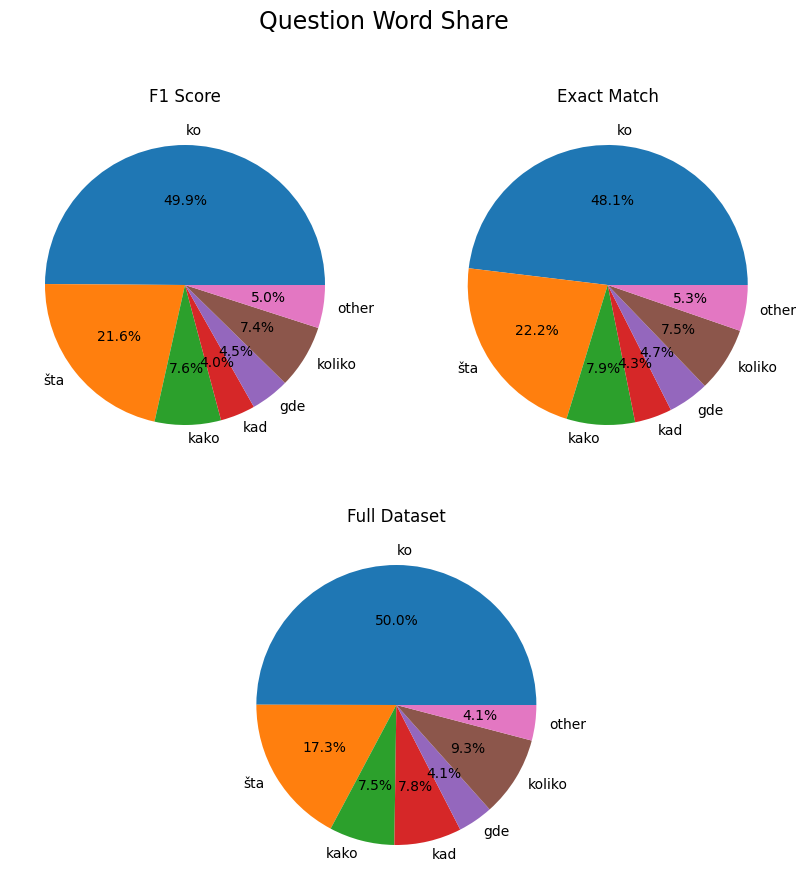

In [19]:
fig = plt.figure()

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

fig.suptitle('Question Word Share', fontsize=17)
fig.set_size_inches(10., 10)
ax3.pie([len(v) for v in dev_sorted.values()], labels = dev_sorted.keys(), autopct='%1.1f%%')
ax3.set_title('Full Dataset')
ax3.grid();
ax2.pie([len(v) for v in em_sorted.values()], labels = em_sorted.keys(), autopct='%1.1f%%')
ax2.set_title('Exact Match')
ax2.grid();
ax1.pie([len(v) for v in f1_sorted.values()], labels = f1_sorted.keys(), autopct='%1.1f%%')
ax1.set_title('F1 Score')
ax1.grid();